In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [ ]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
# RENAMING Value field to hg/ha_yield
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
# dropping unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [ ]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
# checking data types
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [ ]:
# converting average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [ ]:
df_rain = df_rain.dropna()

In [ ]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [ ]:
# merge yield dataframe with rain dataframe by year and area columns
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [ ]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [ ]:
yield_df.shape

(25385, 5)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [ ]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


Working on Pesticides dataset

In [ ]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
# renaming and dropping unnecessary columns
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [ ]:
# merging Pesticides dataframe with yield dataframe
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


Working on temperature data

In [ ]:
# now working on temperature data
avg_temp=  pd.read_csv('temp.csv')
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
avg_temp=avg_temp.dropna()

In [ ]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68764 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      68764 non-null  int64  
 1   Area      68764 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
yield_df=yield_df.drop(['Year'], axis=1)
yield_df

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.00,16.37
1,Albania,Potatoes,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.00,16.37
3,Albania,Sorghum,12500,1485.0,121.00,16.37
4,Albania,Soybeans,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,22222,657.0,2550.07,19.76


In [ ]:
yield_df.shape

(28242, 6)

In [ ]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


### **SAVING DATASET AS CSV**

In [ ]:
yield_df.to_csv('yield_df.csv')
yield_df=pd.read_csv('yield_df.csv')

### **EXPLORING DATA**

In [ ]:
yield_df.groupby('Item').count()

,Unnamed: 0,Area,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
yield_df['Area'].nunique()

101

In [ ]:
yield_df['hg/ha_yield'].describe()

count     28242.000000
mean      77053.332094
std       84956.612897
min          50.000000
25%       19919.250000
50%       38295.000000
75%      104676.750000
max      501412.000000
Name: hg/ha_yield, dtype: float64

## **VISUALISING DATA**

[Text(0.5, 1.0, 'hg/ha_yield')]

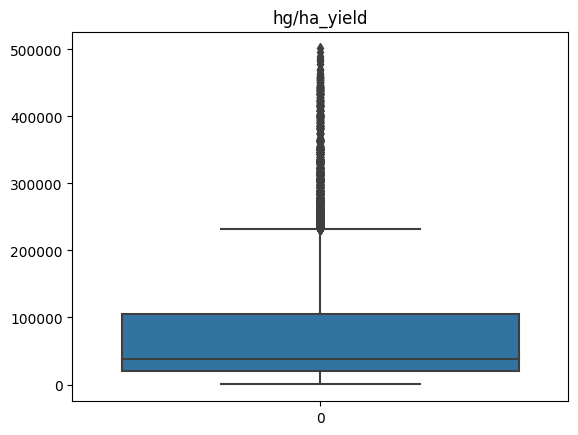

In [ ]:
sns.boxplot(yield_df['hg/ha_yield']).set(title='hg/ha_yield')

[Text(0.5, 1.0, 'avg_temp')]

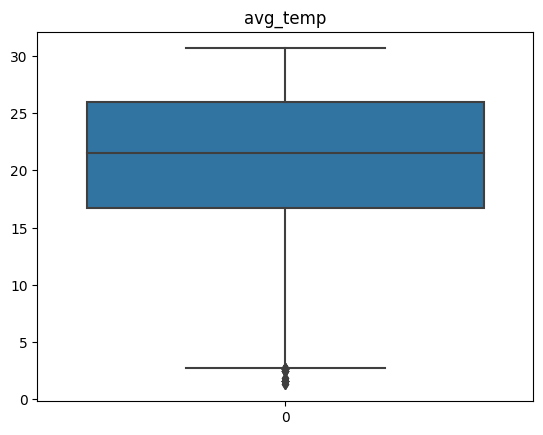

In [ ]:
sns.boxplot(yield_df['avg_temp']).set(title='avg_temp')

[Text(0.5, 1.0, 'pesticides_tonnes')]

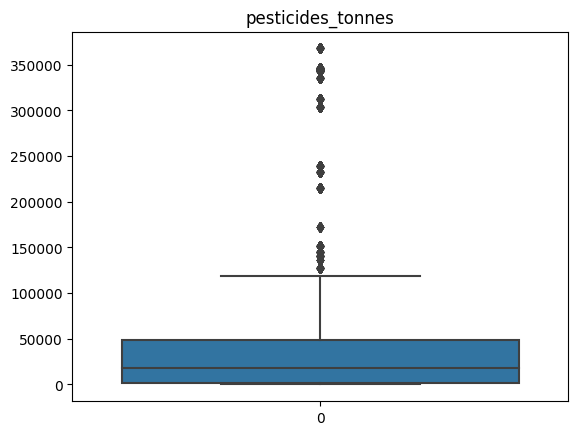

In [ ]:
sns.boxplot(yield_df['pesticides_tonnes']).set(title='pesticides_tonnes')

[Text(0.5, 1.0, 'average_rain_fall_mm_per_year')]

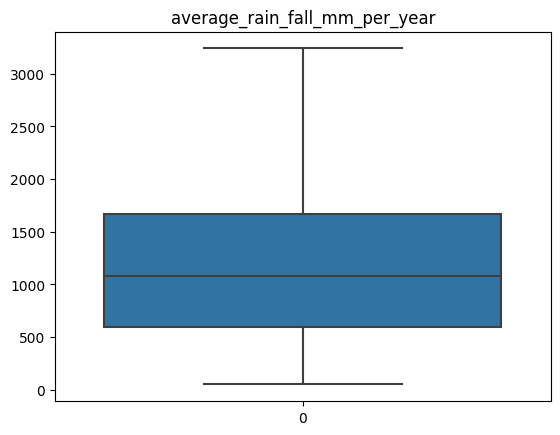

In [ ]:
sns.boxplot(yield_df['average_rain_fall_mm_per_year']).set(title='average_rain_fall_mm_per_year')

In [ ]:
# Top countries based on yield
top_countries=yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)
top_countries

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Name: hg/ha_yield, dtype: int64

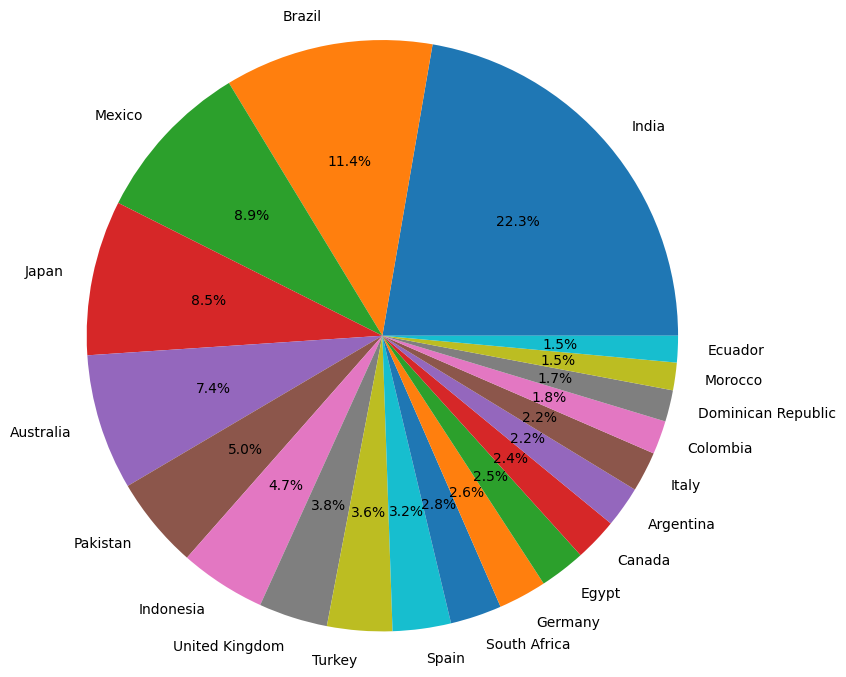

In [ ]:
# Top 20 Countries based on yield
plt.pie(top_countries.values,labels=top_countries.keys(), autopct='%.1f%%', radius=2)
plt.savefig('Top Countries based on yield.png', dpi=600)
plt.show()

In [ ]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [ ]:
# Top coutries based on pesticides used

top_countries_pesticides=yield_df.groupby(['Area'],sort=True)['pesticides_tonnes'].sum().nlargest(10)
top_countries_pesticides

Area
Brazil       4.320309e+08
India        1.961622e+08
Japan        6.789576e+07
Mexico       6.384050e+07
Australia    3.198921e+07
Italy        2.581664e+07
Argentina    2.499804e+07
Canada       2.379243e+07
Colombia     2.193277e+07
Turkey       2.081824e+07
Name: pesticides_tonnes, dtype: float64

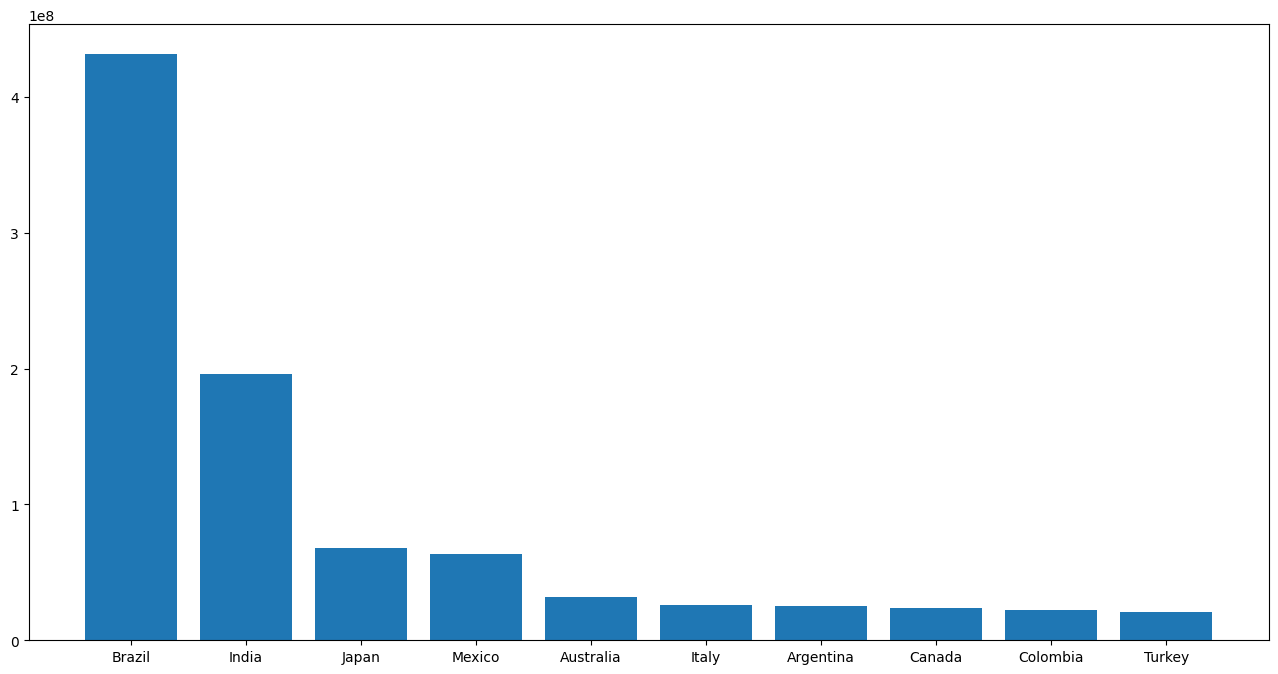

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(top_countries_pesticides.keys(),top_countries_pesticides.values)
plt.savefig('Top Countries based on pesticides.png', dpi=600)
plt.show()

In [ ]:
# Countries with most average_rain_fall_mm_per_year

top_countries_rainfall=yield_df.groupby(['Area'],sort=True)['average_rain_fall_mm_per_year'].sum().nlargest(10)
top_countries_rainfall

Area
India                 4383984.0
Brazil                4009797.0
Indonesia             2237256.0
Japan                 1611288.0
Ecuador               1412154.0
Colombia              1341360.0
Mexico                1115776.0
Bangladesh             783804.0
Pakistan               715806.0
Dominican Republic     518880.0
Name: average_rain_fall_mm_per_year, dtype: float64

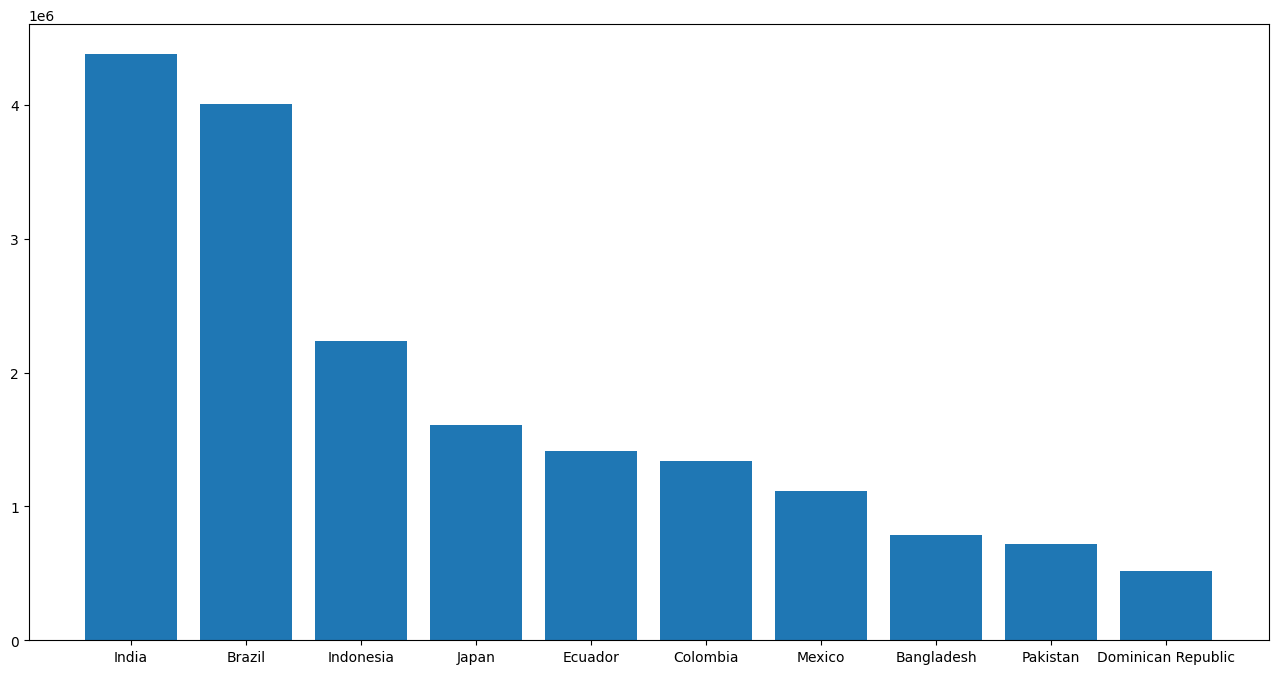

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(top_countries_rainfall.keys(),top_countries_rainfall.values)
plt.savefig('Countries with most average_rain_fall_mm_per_year.png', dpi=600)
plt.show()

In [ ]:
# Top items yielded

top_items=yield_df.groupby(['Item'], sort=True)['hg/ha_yield'].sum().nlargest(20)
top_items

Item
Potatoes                854351426
Sweet potatoes          344077024
Cassava                 307730510
Maize                   149633801
Rice, paddy             137994713
Wheat                   116158445
Yams                     96676873
Plantains and others     58958974
Sorghum                  56634127
Soybeans                 53924312
Name: hg/ha_yield, dtype: int64

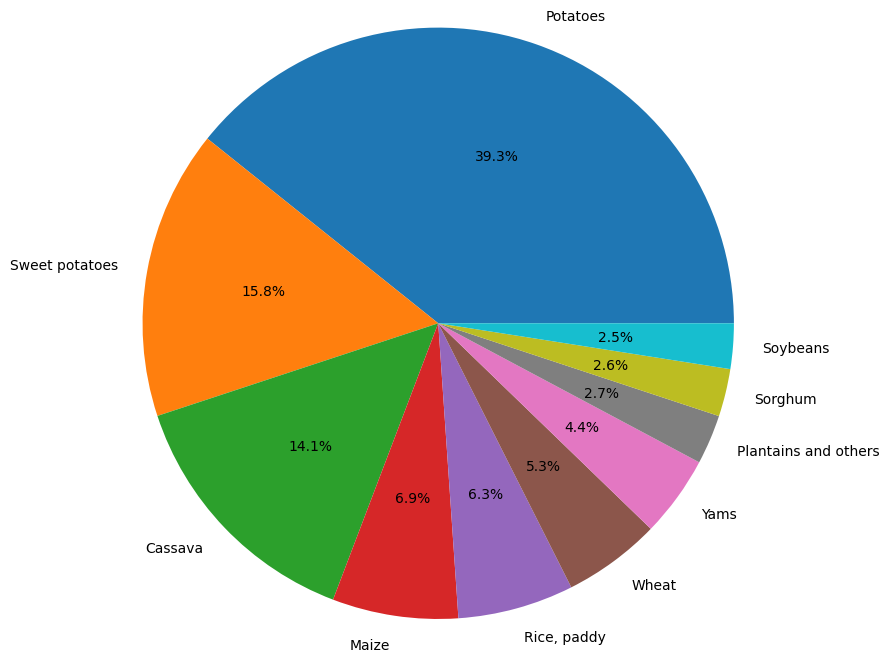

In [ ]:
# Top items yielded
plt.pie(top_items.values,labels=top_items.keys(), autopct='%.1f%%', radius=2)
plt.savefig('Top items yielded.png', dpi=600)
plt.show()

In [ ]:
corr_matrix=yield_df.corr()
corr_matrix

<ipython-input-82-e96cce868156>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=yield_df.corr()


,Unnamed: 0,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Unnamed: 0,1.000000,0.013395,-0.228755,-0.316017,-0.051584
hg/ha_yield,0.013395,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,-0.228755,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,-0.316017,0.064085,0.180984,1.000000,0.030946
avg_temp,-0.051584,-0.114777,0.313040,0.030946,1.000000


<ipython-input-83-71a06bed2cd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = yield_df.corr()


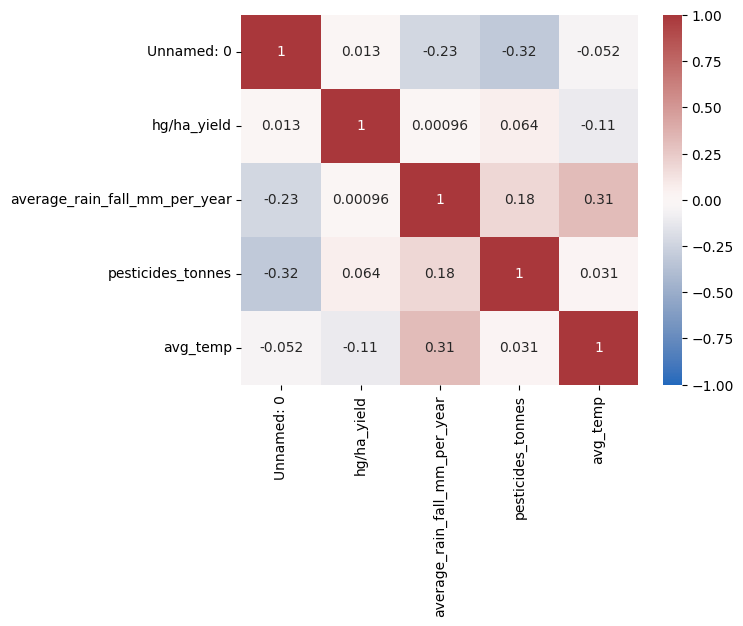

In [ ]:
corr_matrix = yield_df.corr()
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig('correlation.png', dpi=600)
plt.show()